In [3]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme()

In [4]:
#Load the data
profileSrcJSON = pd.read_json('TinderProfiles.json')

In [5]:
#create a copy in order to work with it and not to damage our original dataSet
profileCopy = profileSrcJSON.copy()

In [6]:
#Drop off "__v" column as it has only 0 values
del profileCopy["__v"]

In [7]:
#define the dataframe 
preDf = profileCopy

In [8]:
preDf.head(3)

,_id,appOpens,conversations,conversationsMeta,matches,messages,messagesReceived,messagesSent,swipeLikes,swipePasses,swipes,user,userId
0,00b74e27ad1cbb2ded8e907fcc49eaaf,"{'2016-01-02': 26, '2016-01-13': 10, '2016-01-...","[{'match_id': 'Match 739', 'messages': [{'to':...","{'nrOfConversations': 739, 'longestConversatio...","{'2016-01-02': 10, '2016-01-13': 5, '2016-01-1...","{'sent': {'2016-01-02': 11, '2016-01-13': 2, '...","{'2016-01-02': 12, '2016-01-13': 3, '2016-01-1...","{'2016-01-02': 11, '2016-01-13': 2, '2016-01-1...","{'2016-01-02': 50, '2016-01-13': 70, '2016-01-...","{'2016-01-02': 14, '2016-01-13': 93, '2016-01-...","{'likes': {'2016-01-02': 50, '2016-01-13': 70,...","{'birthDate': '1976-01-01T00:00:00.000Z', 'age...",00b74e27ad1cbb2ded8e907fcc49eaaf
1,024610702baf540af5637873cd1534e9,"{'2016-07-12': 20, '2016-07-13': 18, '2016-07-...","[{'match_id': 'Match 464', 'messages': [{'to':...","{'nrOfConversations': 464, 'longestConversatio...","{'2016-07-12': 1, '2016-07-13': 0, '2016-07-14...","{'sent': {'2016-07-12': 0, '2016-07-13': 0, '2...","{'2016-07-12': 0, '2016-07-13': 0, '2016-07-14...","{'2016-07-12': 0, '2016-07-13': 0, '2016-07-14...","{'2016-07-12': 0, '2016-07-13': 221, '2016-07-...","{'2016-07-12': 0, '2016-07-13': 61, '2016-07-1...","{'likes': {'2016-07-12': 0, '2016-07-13': 221,...","{'birthDate': '1997-07-04T00:00:00.000Z', 'age...",024610702baf540af5637873cd1534e9
2,0a5e3dd8489fe67485ddb7d6adb26ebd,"{'2019-07-01': 61, '2019-07-02': 154, '2019-07...","[{'match_id': 'Match 303', 'messages': [{'to':...","{'nrOfConversations': 303, 'longestConversatio...","{'2019-07-01': 13, '2019-07-02': 12, '2019-07-...","{'sent': {'2019-07-01': 12, '2019-07-02': 66, ...","{'2019-07-01': 6, '2019-07-02': 70, '2019-07-0...","{'2019-07-01': 12, '2019-07-02': 66, '2019-07-...","{'2019-07-01': 87, '2019-07-02': 39, '2019-07-...","{'2019-07-01': 30, '2019-07-02': 12, '2019-07-...","{'likes': {'2019-07-01': 87, '2019-07-02': 39,...","{'birthDate': '1998-02-06T00:00:00.000Z', 'age...",0a5e3dd8489fe67485ddb7d6adb26ebd


### Each profile has an ID number which we use to check how many users are in the dataset. We also verify that there aren't any Duplicate Accounts in this dataset before continuing on with our research!

In [9]:
userid = []
for uniqueid in preDf.userId:
    userid.append(uniqueid[-6:])

In [10]:
totalUserid = userid[:1180]

### We want to see how many times each user opened the app in our dataset, and also what their average daily number was.


In [11]:
import sys 

#check how many people open the app (daily)
personOpeners = []
for openers in preDf.appOpens:
    if len(openers) == 0:
        continue
    maxDate = ""
    maxOpens = 0
    minDate = ""
    minOpens = sys.maxsize
    for date in openers:
        if (openers[date] > maxOpens):
            maxOpens = openers[date]
            maxDate = date

        if (openers[date] < minOpens):
            minOpens = openers[date]
            minDate = date

    personOpeners.append(minOpens)
    # append the vals to a list

counter = 0
for j in personOpeners:
    if j >= 1:
        counter += 1 

print(f'there are {counter} people who open the app every day')


there are 290 people who open the app every day


In [12]:
#import the langdetect in order to detect the lenguaje of the message
#We will focus on English, Spanish and Japanese 
from langdetect import detect

### Since the messages are in a JSON structure, we have to take those out in order to do our language classification and run the sentiment analysis

In [13]:
allMessages = []
numberConversations = []
for conversation in preDf.conversations:
    messages = []
    numberMessages = 0
    for match in conversation:
        for message in match['messages']:
            if 'message' in message.keys():
                messages.append(message['message'])
                numberMessages += 1
    messages = messages[:5]
    allMessages.append(messages)
    numberConversations.append(numberMessages)
len(allMessages)

1209

In [14]:
totalMessages = allMessages[:1180]
totalnumberConversations = numberConversations[:1180]

In [15]:
# identify the lenguaje of the user
# extract the first line of each conversation
alllengu = []
for conversation in preDf.conversations:
    for match in conversation:
        lengu = []
        for message in match['messages']:
            if 'message' in message.keys():
                    try:
                        language = detect(message['message'])
                        lengu.append(language) 
                    except:
                        1 
        lengu = lengu[:1]
        alllengu.append(lengu)
        break

In [16]:
len(alllengu)

1180

In [101]:
#list of numbers, each number is a user 
totalMatches = []

for dfMatches in preDf.matches:
    #variable name 
    totalMatchesUser = 0
    for MatchDate in dfMatches:
        totalMatchesUser += dfMatches[MatchDate]
    totalMatches.append(totalMatchesUser)


In [102]:
totalMatches = totalMatches[:1180]

In [90]:
#total swipes right per use
totalSwipesRight = [] 
for dfSwipeLikes in preDf.swipeLikes:    
    countSwipesRight = 0
    for swipeRight in dfSwipeLikes.values():
        countSwipesRight += swipeRight
        # break
    totalSwipesRight.append(countSwipesRight)

In [94]:
totalSwipesRight = totalSwipesRight[:1180]

In [105]:
#total swipes left per user
totalSwipesLeft = []
for dfSwipePasses in preDf.swipePasses:
    countSwipesLeft = 0
    for swipeLeft in dfSwipePasses.values():
        countSwipesLeft += swipeLeft
        # break
    totalSwipesLeft.append(countSwipesLeft)

In [106]:
totalSwipesLeft = totalSwipesLeft[:1180]

In [23]:
#import library for know the user age 
from datetime import date
from datetime import datetime

#Take user anonymous data and break down the dictionary format
allBirthDates=[]

#Users date of birth
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year #- ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

for person in preDf.user:
    birthdateStr = person['birthDate'][:10]
    birthdate = datetime.strptime(birthdateStr, '%Y-%m-%d')
    userAge = age(birthdate)
    allBirthDates.append(userAge)

In [24]:
totalAllBirthDates = allBirthDates[:1180]

In [25]:
#Users city
# for person in preDf.user:
#     print(person)
#     allcities.append(person['cityName'])

#Users country
allcountreis = []
counter = 0
for person in preDf.user:
    if 'country' in person.keys():
        allcountreis.append(person['country'])
    else:
        allcountreis.append('')
        counter += 1
print(counter)

479


### CREATE THE DATASET WITH DATA WE HAVE CLEANED

In [107]:
#We insert the unique user id
df = pd.DataFrame(totalUserid, columns=['user'])
df.head(3)

,user
0,49eaaf
1,1534e9
2,b26ebd


In [108]:
#check if there is user with Null value in their id
pd.isnull(df.loc[1, 'user'])

False

In [109]:
#Merge app_opens data with df
df['Messages'] = totalMessages
df['Lenguage'] = alllengu
df['SwipesRight'] = totalSwipesRight
df['SwipesLeft'] = totalSwipesLeft
df['Matches'] = totalMatches
df['Num Of Messages'] = totalnumberConversations
df['Age'] = totalAllBirthDates

In [111]:
df.head(10)

,user,Messages,Lenguage,SwipesRight,SwipesLeft,Matches,Num Of Messages,Age
0,49eaaf,[],[],23341,24229,3408,0,46
1,1534e9,"[Hello again, so now that we matched again, wh...",[en],45068,49559,888,2086,25
2,b26ebd,"[It&rsquo;s me, the chicken nuggets, Exactly w...",[en],6679,5500,548,1289,24
3,ffbf58,[I&apos;m worried about you. Based on your hik...,[en],6724,7899,94,371,24
4,8a5cc1,[],[],60169,96673,1905,0,26
5,d6e87e,"[Holaaa Andrea! Igual bonito inicio de semana,...",[it],22552,5477,203,2768,28
6,c4d365,[],[],25138,22748,3295,0,46
7,8a177d,[],[],774,480,87,0,28
8,a0a92f,"[Terve😊, Helsingissä asun mut nyt frendin möki...",[],4532,115619,1781,5383,30
9,90b7d6,"[hey, nice pics ;&rpar;, well so how are you d...",[en],52133,45064,5075,7567,27


In [30]:
len(df.index)

1180

In [31]:
#drop users with empty list
df = df[~df.Messages.str.len().eq(0)]
df.head()

,user,Messages,Lenguage,SwipesRight,SwipesLeft,Matches,Num Of Messages,Age
1,1534e9,"[Hello again, so now that we matched again, wh...",[en],45068,45068,888,2086,25
2,b26ebd,"[It&rsquo;s me, the chicken nuggets, Exactly w...",[en],6679,6679,548,1289,24
3,ffbf58,[I&apos;m worried about you. Based on your hik...,[en],6724,6724,94,371,24
5,d6e87e,"[Holaaa Andrea! Igual bonito inicio de semana,...",[it],22552,22552,203,2768,28
8,a0a92f,"[Terve😊, Helsingissä asun mut nyt frendin möki...",[],4532,4532,1781,5383,30


In [32]:
len(df.index)

1138

In [33]:
#drop users with 0  SwipesRight or 0 SwipesLeft
df = df.loc[~((df['SwipesRight'] == 0) | (df['SwipesLeft'] == 0) | (df['Num Of Messages'] == 0))]
df

,user,Messages,Lenguage,SwipesRight,SwipesLeft,Matches,Num Of Messages,Age
1,1534e9,"[Hello again, so now that we matched again, wh...",[en],45068,45068,888,2086,25
2,b26ebd,"[It&rsquo;s me, the chicken nuggets, Exactly w...",[en],6679,6679,548,1289,24
3,ffbf58,[I&apos;m worried about you. Based on your hik...,[en],6724,6724,94,371,24
5,d6e87e,"[Holaaa Andrea! Igual bonito inicio de semana,...",[it],22552,22552,203,2768,28
8,a0a92f,"[Terve😊, Helsingissä asun mut nyt frendin möki...",[],4532,4532,1781,5383,30
...,...,...,...,...,...,...,...,...
1173,be6a5a,"[I am great, whats up?, Yesd, Titanic xD, I he...",[nl],581,581,4,121,24
1174,fccfbe,"[You&rsquo;re kinda cute 🙈, Where are you now?...",[da],89628,89628,5393,21339,34
1175,86d422,"[Hi, Yes, Stats?, how&apos;s your weekend been...",[pl],2207,2207,524,2886,22
1176,fb50c2,[Hey! How&apos;s the covid life treating you? ...,[],33391,33391,306,1235,26


In [34]:
len(df.index)

934

In [35]:
#drop users with empty list
df = df[~df.Lenguage.str.len().eq(0)]

In [36]:
df.head()

,user,Messages,Lenguage,SwipesRight,SwipesLeft,Matches,Num Of Messages,Age
1,1534e9,"[Hello again, so now that we matched again, wh...",[en],45068,45068,888,2086,25
2,b26ebd,"[It&rsquo;s me, the chicken nuggets, Exactly w...",[en],6679,6679,548,1289,24
3,ffbf58,[I&apos;m worried about you. Based on your hik...,[en],6724,6724,94,371,24
5,d6e87e,"[Holaaa Andrea! Igual bonito inicio de semana,...",[it],22552,22552,203,2768,28
9,90b7d6,"[hey, nice pics ;&rpar;, well so how are you d...",[en],52133,52133,5075,7567,27


In [37]:
len(df.index)

792

In [38]:
#export to csv
df.to_csv('cleanDf.csv', encoding='utf-8')

In [39]:
#Counter how many males 
countM = 0
for user in preDf.user:
    if user['gender'] == 'M':
        countM += 1

In [40]:
#Counter how many males 
countF = 0
for user in preDf.user:
    if user['gender'] == 'F':
        countF += 1

In [41]:
#Counter people who are interested in 'M'
counterM = 0
for user in preDf.user:
    if user["interestedIn"] == "M":
        counterM += 1
print(f"The number of people interested in 'M' are:  {counterM}")

The number of people interested in 'M' are:  134


In [42]:
#Counter people who are interested in 'F'
counterF = 0
for user in preDf.user:
    if user["interestedIn"] == "F":
        counterF += 1
print(f"The number of people interested in 'F' are:  {counterF}")

The number of people interested in 'F' are:  1017


In [43]:
#Counter people who are interested in 'M and F'
counterBi = 0
for user in preDf.user:
    if user["interestedIn"] != "F" and user["interestedIn"] != "M":
        counterBi += 1
print(f"The number of people interested in 'M and F' are:  {counterBi}")

The number of people interested in 'M and F' are:  58


# INSIGHTS 

## APP OPENERS 
% of people who open the app every day 

In [44]:
print(f'there are {counter} people who open the app every day')

there are 479 people who open the app every day


## MATCHES 

In [46]:
preDf.head(1)

,_id,appOpens,conversations,conversationsMeta,matches,messages,messagesReceived,messagesSent,swipeLikes,swipePasses,swipes,user,userId
0,00b74e27ad1cbb2ded8e907fcc49eaaf,"{'2016-01-02': 26, '2016-01-13': 10, '2016-01-...","[{'match_id': 'Match 739', 'messages': [{'to':...","{'nrOfConversations': 739, 'longestConversatio...","{'2016-01-02': 10, '2016-01-13': 5, '2016-01-1...","{'sent': {'2016-01-02': 11, '2016-01-13': 2, '...","{'2016-01-02': 12, '2016-01-13': 3, '2016-01-1...","{'2016-01-02': 11, '2016-01-13': 2, '2016-01-1...","{'2016-01-02': 50, '2016-01-13': 70, '2016-01-...","{'2016-01-02': 14, '2016-01-13': 93, '2016-01-...","{'likes': {'2016-01-02': 50, '2016-01-13': 70,...","{'birthDate': '1976-01-01T00:00:00.000Z', 'age...",00b74e27ad1cbb2ded8e907fcc49eaaf


In [ ]:
user = preDf['Age']

In [ ]:
user[0]

{'birthDate': '1976-01-01T00:00:00.000Z',
 'ageFilterMin': 21,
 'ageFilterMax': 35,
 'cityName': 'Trondheim',
 'country': 'Norway',
 'createDate': '2016-01-01T09:30:07.551Z',
 'education': 'Has high school and/or college education',
 'gender': 'M',
 'interestedIn': 'F',
 'genderFilter': 'F',
 'instagram': False,
 'spotify': False,
 'jobs': [],
 'educationLevel': 'Has high school and/or college education',
 'schools': []}

In [ ]:
def get_user_value(column):
    column_list = []
    for details in user:
        # print(details.keys())
        if column in details.keys():
            column_list.append(details[column])
        else:
            column_list.append('others')

    return column_list

In [ ]:
new_preDf =preDf.copy()

In [ ]:
new_preDf['country'] = get_user_value('country')
new_preDf['gender'] = get_user_value('gender')
new_preDf['Age'] = get_user_value('birthDate')
new_preDf['InterestedIn'] = get_user_value('interestedIn') 

In [ ]:
new_preDf.head(1)

,_id,appOpens,conversations,conversationsMeta,matches,messages,messagesReceived,messagesSent,swipeLikes,swipePasses,swipes,user,userId,country,gender,Age,InterestedIn
0,00b74e27ad1cbb2ded8e907fcc49eaaf,"{'2016-01-02': 26, '2016-01-13': 10, '2016-01-...","[{'match_id': 'Match 739', 'messages': [{'to':...","{'nrOfConversations': 739, 'longestConversatio...","{'2016-01-02': 10, '2016-01-13': 5, '2016-01-1...","{'sent': {'2016-01-02': 11, '2016-01-13': 2, '...","{'2016-01-02': 12, '2016-01-13': 3, '2016-01-1...","{'2016-01-02': 11, '2016-01-13': 2, '2016-01-1...","{'2016-01-02': 50, '2016-01-13': 70, '2016-01-...","{'2016-01-02': 14, '2016-01-13': 93, '2016-01-...","{'likes': {'2016-01-02': 50, '2016-01-13': 70,...","{'birthDate': '1976-01-01T00:00:00.000Z', 'age...",00b74e27ad1cbb2ded8e907fcc49eaaf,Norway,M,1976-01-01T00:00:00.000Z,F


In [ ]:

Age = [2022 - int(birth_year.split('-')[0]) for birth_year in new_preDf['Age'] ]

In [ ]:
AgeClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [ ]:
new_preDf['Age'] =Age

In [ ]:
new_preDf.Age.head()

0    46
1    25
2    24
3    24
4    26
Name: Age, dtype: int64

In [ ]:
Male = pd.DataFrame(new_preDf.query('gender=="M"')['Age'])

In [ ]:
Male_age_range = []
for age in Male['Age']:
    if age >=100:
            Male_age_range.append('100+')    
    else:
        for i in AgeClass[1:]:
            if age in range(int(i.split('-')[0]),int(i.split('-')[1])+1):
                Male_age_range.append(i)
        

In [ ]:
len(Male_age_range)

1058

In [ ]:
len(Male['Age'])

1058

In [ ]:
Male['Age_range'] = Male_age_range

In [ ]:
Male

,Age,Age_range
0,46,45-49
1,25,25-29
2,24,20-24
3,24,20-24
4,26,25-29
...,...,...
1204,28,25-29
1205,26,25-29
1206,20,20-24
1207,22,20-24


In [ ]:
Female = pd.DataFrame(new_preDf.query('gender=="F"')['Age'])

In [ ]:
age_range = []
for age in Female['Age']:
    if age >=100:
        age_range.append('100+')    
    else:
        for i in AgeClass[1:]:
            if age in range(int(i.split('-')[0]),int(i.split('-')[1])+1):
                age_range.append(i)

In [ ]:
Female['Age_range'] = age_range

In [ ]:
Female

,Age,Age_range
6,46,45-49
8,30,30-34
18,23,20-24
36,30,30-34
38,26,25-29
...,...,...
1144,26,25-29
1158,20,20-24
1161,23,20-24
1182,24,20-24


## Age

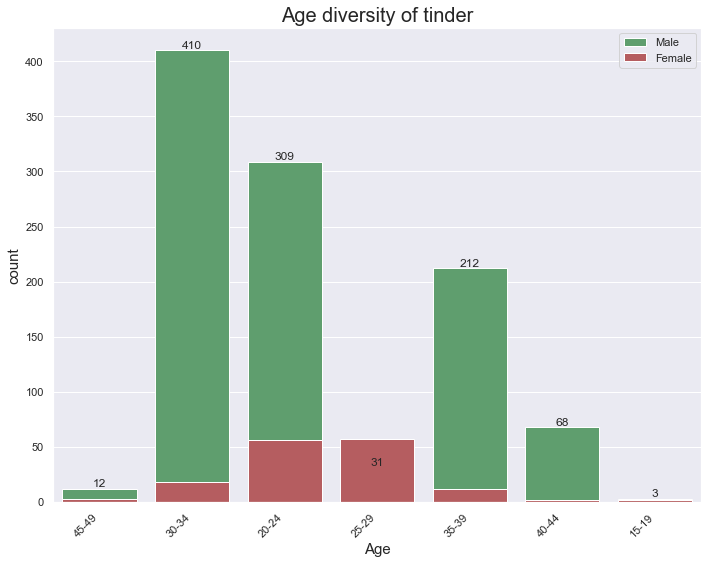

In [ ]:
plt.figure(figsize=(10,8))
bar_plot = sn.countplot(x=Male['Age_range'],color=sn.color_palette()[2])
bar_plot = sn.countplot(x=Female['Age_range'],color=sn.color_palette()[3])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_plot.bar_label(bar_plot.containers[0])
# print(bar_plot.)
plt.title('Age diversity of tinder',fontsize=20)
plt.ylabel('count',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.legend(['Male', 'Female'])
plt.show()

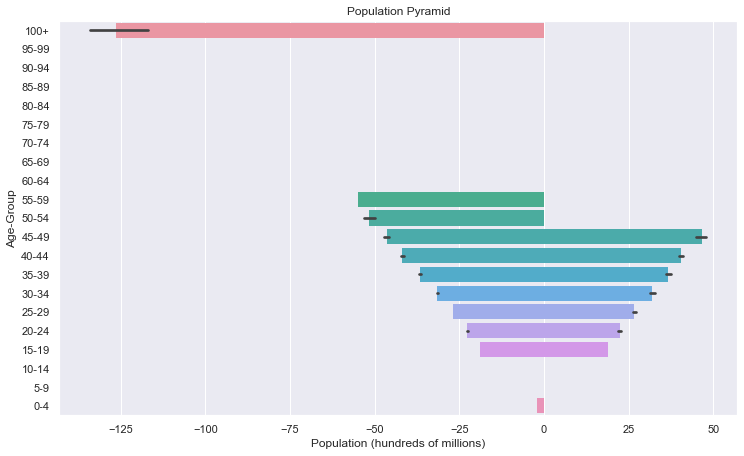

In [ ]:
AgeClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sn.barplot(x=Male['Age']*-1, y=Male['Age_range'],data=Male, order=AgeClass,lw=0)

bar_plot = sn.barplot(x=Female['Age'], y=Female['Age_range'],data=Female, order=AgeClass,lw=0)

bar_plot.set(xlabel="Population (hundreds of millions)", ylabel="Age-Group", title = "Population Pyramid");

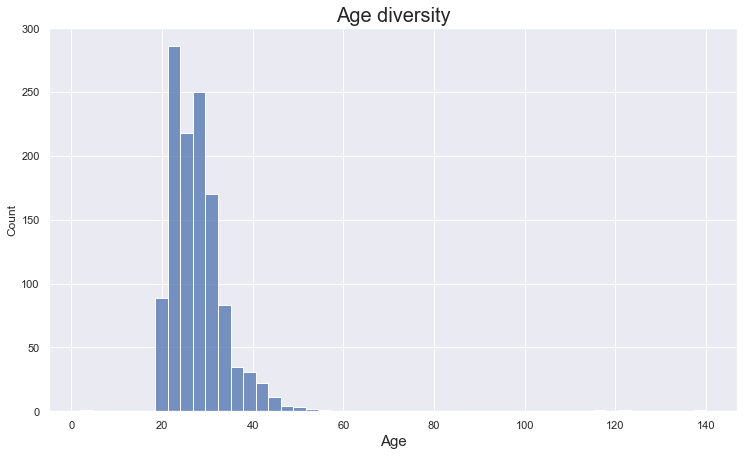

In [ ]:
sn.histplot(x=allBirthDates,bins=50)
plt.title("Age diversity",fontsize=20)
plt.xlabel('Age',fontsize=15);

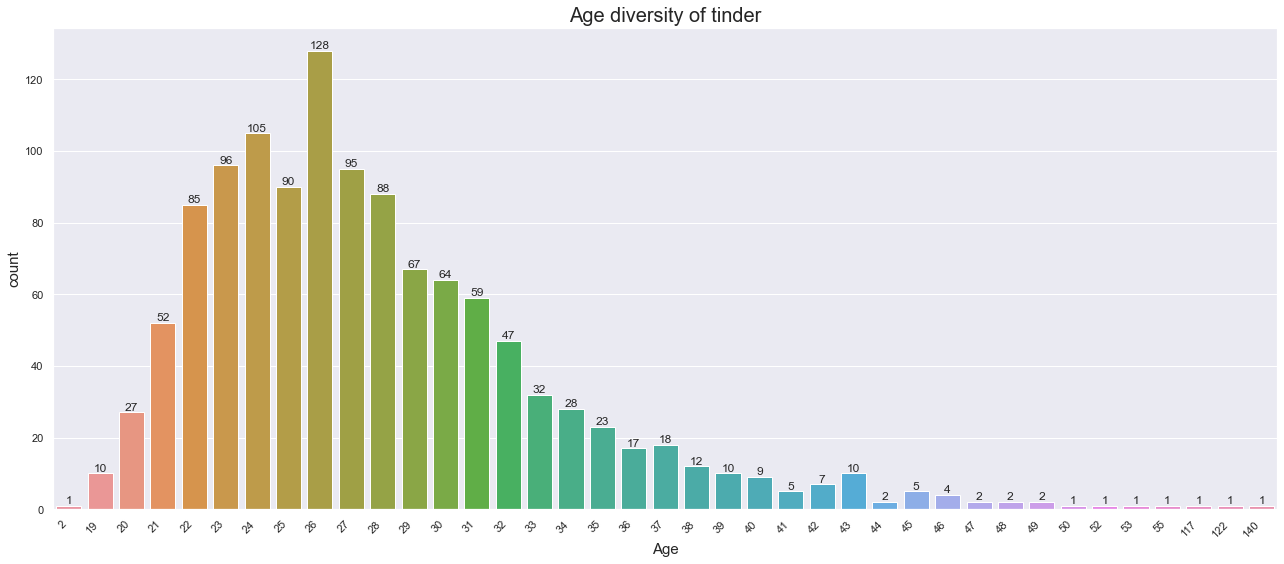

In [ ]:
plt.figure(figsize=(18,8))
bar_plot = sn.countplot(x=allBirthDates)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_plot.bar_label(bar_plot.containers[0])
# print(bar_plot.)
plt.title('Age diversity of tinder',fontsize=20)
plt.ylabel('count',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.show()

## Diversity

In [ ]:
print(np.arange(3)*4)

[0 4 8]


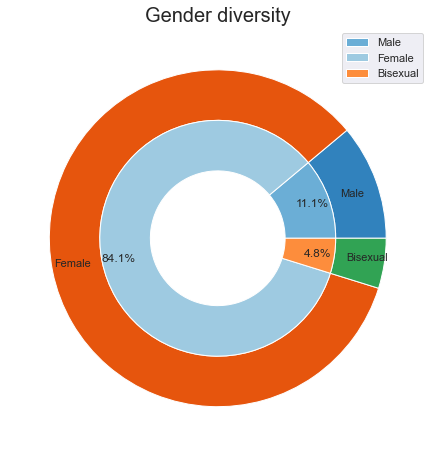

In [ ]:

plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
size = 0.3
vals = [counterM,counterF,counterBi]
# values = [40,30,20,10,10]
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals, radius=1, colors=outer_colors,
   wedgeprops=dict(width=size, edgecolor='w'),autopct='%2.1f%%')
ax.pie(vals, radius=1-size, colors=inner_colors,
   wedgeprops=dict(width=size, edgecolor='w'),labels= ['Male','Female','Bisexual'])
plt.title('Gender diversity',fontsize=20)
plt.legend()
plt.show()


## Country diversity

In [ ]:
count = 0
for data in new_preDf['country']:
    # print(data)
    if count <= 370:
        if data =='Japan':
            new_preDf.drop(count,inplace=True)
            count+=1
        else:
           
            pass
    else:
        break
        

In [ ]:
country_plot = new_preDf['country'].value_counts()

In [ ]:
country_plot.head(2)

,index,location,country
0,0,Japan,479
1,1,Canada,27


In [ ]:
country_plot = pd.DataFrame(country_plot).reset_index()

In [ ]:
country_plot.head()

,index,country
0,others,479
1,CA,27
2,England,20
3,Germany,19
4,United Kingdom,18


In [ ]:
country_plot.rename(columns={'index':'location'},inplace=True)

In [ ]:
len(country_plot.index)

244

In [ ]:
from geopy import geocoders
import time
geolocator = geocoders.Nominatim(user_agent = "geoapiExercises")
index = 1
for  country in country_plot['location']:
    location = geolocator.geocode(country)
    result = str(location).split(',')[-1] 
    country_plot.location = country_plot.location.replace(country,result.strip())
    
    index+=1
    

In [ ]:
country_plot['location']=country_plot['location'].str.replace('日本','Japan').replace('Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب',"Morocco")

In [ ]:
country_plot.head()

,location,country
0,Japan,479
1,Canada,27
2,United Kingdom,20
3,Deutschland,19
4,United Kingdom,18


In [ ]:
d = {'location': 'first', 'country': 'sum'}
most_popular_country = country_plot.groupby('location', as_index=False).aggregate(d).reindex(columns=country_plot.columns)

In [ ]:
# country_plot.groupby('location')['country']
most_popular_country.head(2)
country_data = most_popular_country.query('country>=5')
sorted_country_data = country_data.sort_values('country',ascending=False)

In [ ]:
sorted_country_data.head()

,location,country
17,Japan,480
44,United States,171
4,Canada,59
8,Deutschland,55
43,United Kingdom,45


In [ ]:
sorted_country_data['location']=sorted_country_data['location'].str.replace('日本','Japan').replace('Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب',"Morocco")

In [ ]:
sorted_country_data.drop(17,inplace=True)

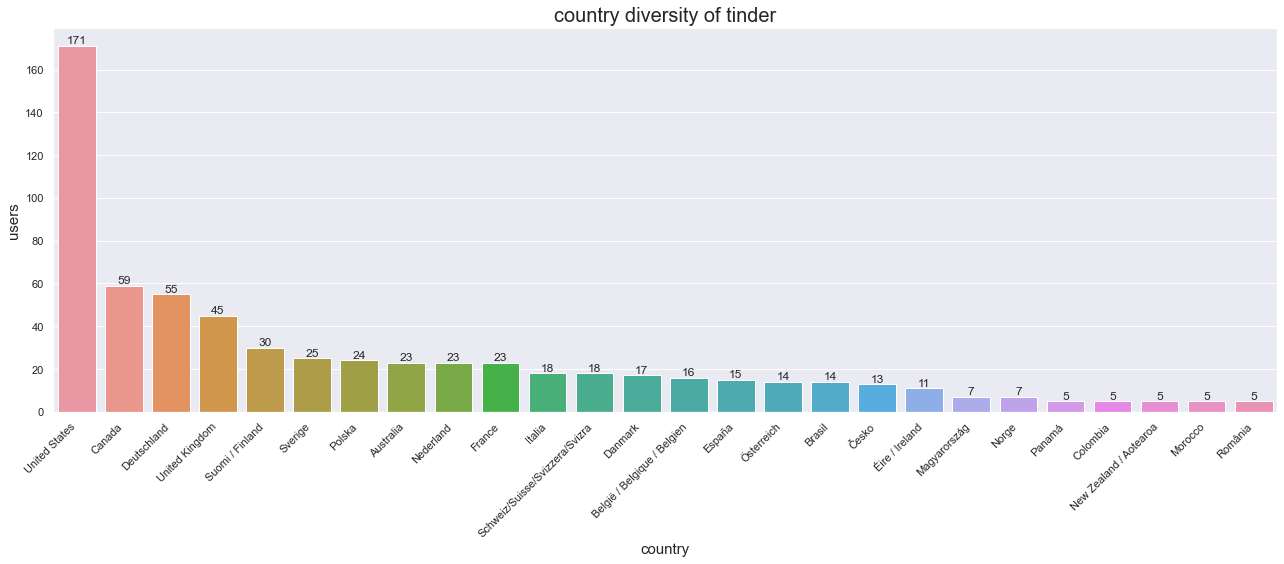

In [ ]:
plt.figure(figsize=(18,8))
bar_plot = sn.barplot(x=sorted_country_data['location'],y=sorted_country_data['country'])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_plot.bar_label(bar_plot.containers[0])
# print(bar_plot.)
plt.title('country diversity of tinder',fontsize=20)
plt.ylabel('users',fontsize=15)
plt.xlabel('country',fontsize=15)
plt.show()

## InterestedIn diversity

In [ ]:
interest  = new_preDf.loc[((new_preDf['InterestedIn'] == 'F') | (new_preDf['InterestedIn']=='M') | (new_preDf['InterestedIn']=='M and F'))]

In [ ]:
interest = new_preDf['InterestedIn'].value_counts()

In [ ]:
interest = interest[:-1]
interest.index

Index(['F', 'M', 'M and F'], dtype='object')

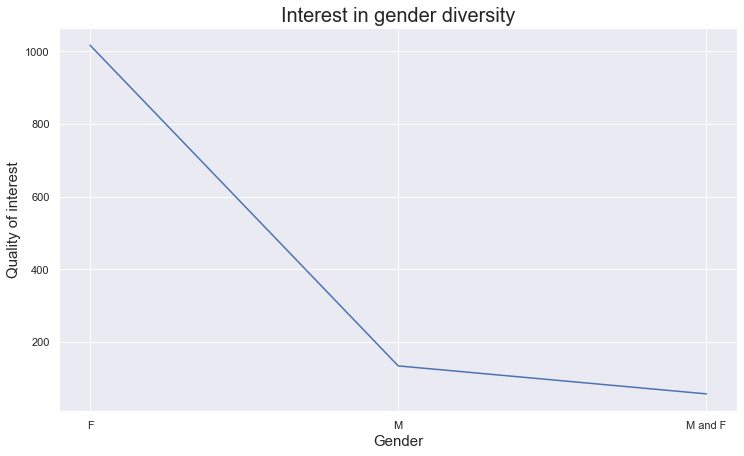

In [ ]:
sn.lineplot(x=interest.index,y=interest);
plt.title('Interest in gender diversity',fontsize=20)
plt.ylabel('Quality of interest',fontsize=15)
plt.xlabel('Gender',fontsize=15);
plt.show()

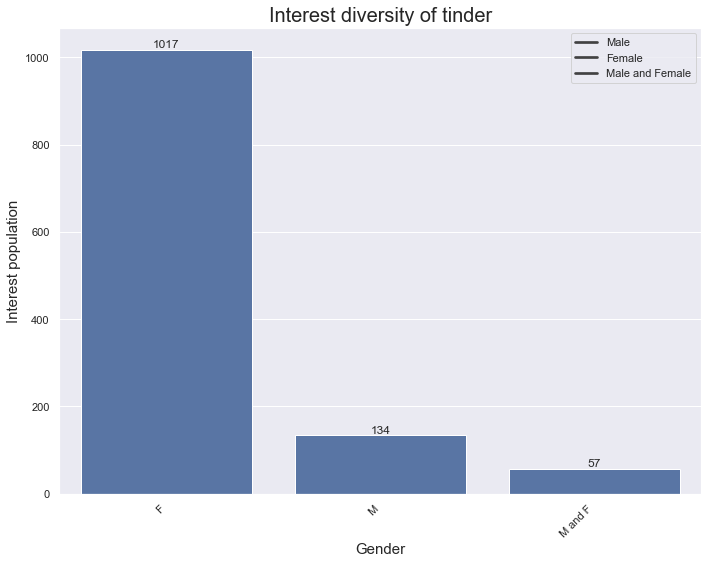

In [ ]:
plt.figure(figsize=(10,8))
bar_plot = sn.barplot(x=interest.index,y=interest,color=sn.color_palette()[0])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_plot.bar_label(bar_plot.containers[0])
plt.title('Interest diversity of tinder',fontsize=20)
plt.ylabel('Interest population',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.legend(['Male', 'Female','Male and Female'])
plt.show()

In [ ]:
interest

F          1017
M           134
M and F      57
Name: InterestedIn, dtype: int64

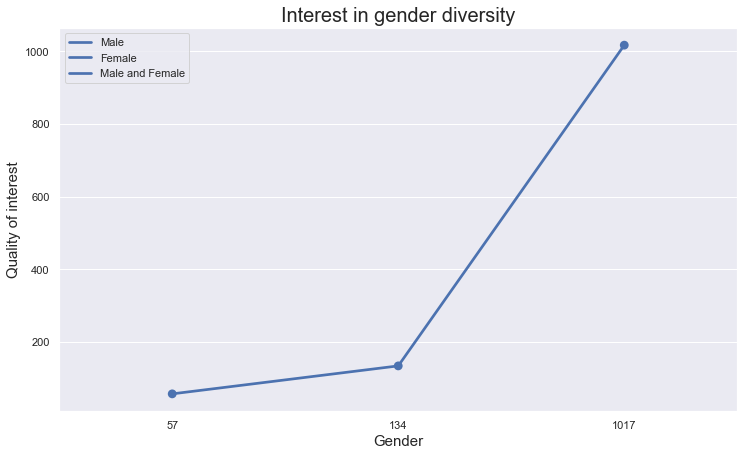

In [ ]:
sn.pointplot(data=interest, x=interest, y=interest.index)
plt.title('Interest in gender diversity',fontsize=20)
plt.ylabel('Quality of interest',fontsize=15)
plt.xlabel('Gender',fontsize=15);
plt.legend(['Male', 'Female','Male and Female'])
plt.show()

